### 19 Вариант a=220 b=3 n=2 f0=12

Требуется найти минимум тестовой функции Розенброка, используя различные функции оптимизации.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import HTML
plt.rc('animation', html='html5')

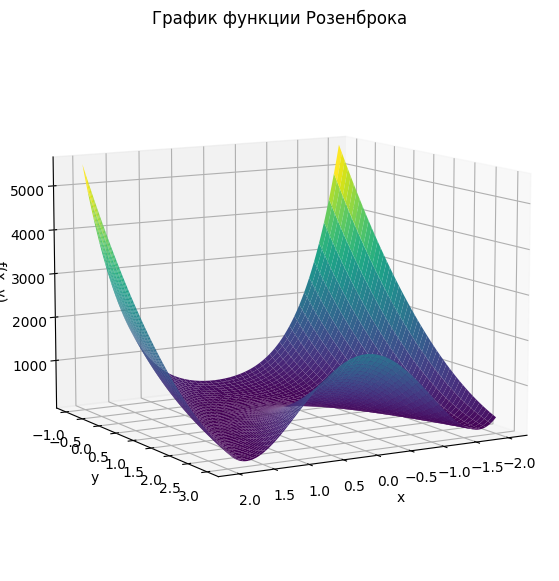

Минимум функции Розенброка в точке (1;1): 12


In [ ]:
class Rosenbrock(object):
    def __init__(self,f0=12, a=220, b=3):
        self.f0=f0
        self.a=a
        self.b=b
    def func(self,x):
        return self.b*(1-x[0])**2 + self.a * (x[1]-x[0]**2)**2 + self.f0

    def derivative(self,x):
        grad = np.zeros_like(x)
        grad[0] = -2*self.b *(1-x[0]) - self.a*4*x[0] * ( x[1]-x[0]**2)
        grad[1] = 2 * self.a * (x[1]-x[0]**2)
        return grad

    def hessian(self,x):
        hessian = np.zeros((2, 2))
        hessian[0, 0] = 2 - 4*self.a * x[1] + 12*self.a * x[0]**2
        hessian[0, 1] = -4*self.a * x[0]
        hessian[1, 0] = -4*self.a * x[0]
        hessian[1, 1] = 2*self.a
        return hessian

rosenbrock=Rosenbrock()

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

Z = rosenbrock.func([X, Y])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_title("График функции Розенброка")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.view_init(elev=10, azim=60)

plt.show()

print(f"Минимум функции Розенброка в точке (1;1): {rosenbrock.func([1,1])}")

In [ ]:
from matplotlib.animation import FuncAnimation
def show_path(path):
    x1 = np.linspace(-2, 2, 400)  # Создаем массив для x1
    x2 = np.linspace(-1, 3, 400)  # Создаем массив для x2
    X1, X2 = np.meshgrid(x1, x2)  # Создаем сетку

    # Вычисление значений функции Розенброка на сетке
    Z = rosenbrock.func(np.array([X1, X2]))

    # Визуализация в 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Построение поверхности
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)  # alpha для прозрачности
    ax.set_title('Функция Розенброка (3D)')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')

    # Отображение точки минимума
    min_point = np.array([1, 1])
    ax.scatter(min_point[0], min_point[1], rosenbrock.func(min_point), color='green', s=100, label='Минимум (1, 1, 0)')
    ax.set_title('Функция Розенброка (3D)')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.view_init(elev=30, azim=60)  # Установка угла зрения

    # Визуализация пути градиентного спуска
    path_x = path[:, 0]
    path_y = path[:, 1]
    path_z = rosenbrock.func(path.T)

    # Подготовка линии для пути градиентного спуска
    line = ax.plot(path_x, path_y, path_z, 'ro-', markersize=5, label='Путь градиентного спуска')

    # Анимация
    def init():
        """ Инициализация анимации. """
        line[0].set_data([], [])
        line[0].set_3d_properties([])
        return line

    def update(frame):
        """ Обновление для кадров анимации. """
        line[0].set_data(path[:frame + 1, 0], path[:frame + 1, 1])
        line[0].set_3d_properties(rosenbrock.func(path[:frame + 1].T).flatten())
        line[0].set_3d_properties(rosenbrock.func(path[:frame + 1].T).flatten())
        return line

    # Количество кадров в анимации
    num_frames = len(path)


    # Создание анимации
    anim = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, repeat=False)

    return HTML(anim.to_html5_video())

[0.92703392 0.89077957]
12.232713250971903
10000


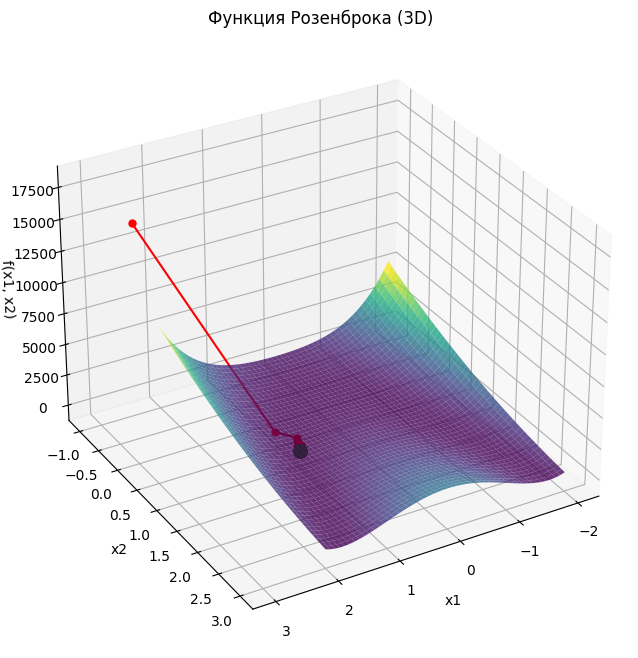

In [ ]:
def gradient_descent(x0, learning_rate=0.001, tol=1e-6, max_iter=10000):
    x = x0
    path = [x.copy()]

    for k in range(max_iter):
        grad = rosenbrock.derivative(x)
        if np.linalg.norm(grad) > 100:
            grad /= 0.1 * np.linalg.norm(grad)
        x_new = x - learning_rate * grad

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new
        path.append(x.copy())

    return np.array(path), rosenbrock.func(x), k+1

# Начальная точка
x0 = np.array([3.0, 0.0])

# Поиск минимума
solution, function_value, iterations = gradient_descent(x0)
print(solution[-1])
print(function_value)
print(iterations)

sols = []
step=len(solution)//50
for i in range (0,len(solution),step):
  sols.append(solution[i])

show_path(np.array(sols))

### Метод Флетчера-Ривза

Оптимальное решение: [1.00000009 1.00000019]
Минимальное значение функции: 12.000000000000027
Число итераций: 149


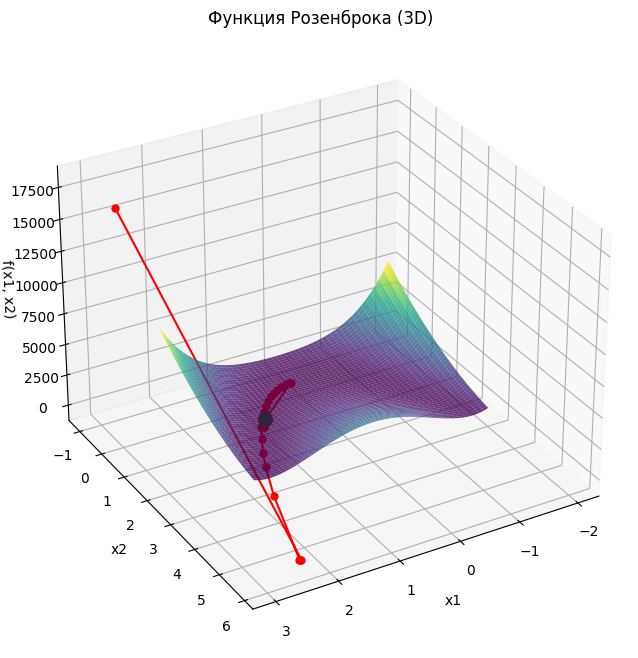

In [ ]:
def fletcher_reeves(x0, tol=1e-6, max_iter=1000):
    x = x0
    path = [x.copy()]
    g = rosenbrock.derivative(x)
    d = -g
    k = 0

    while np.linalg.norm(g) > tol and k < max_iter:
        # Вычисление шага с помощью простого линейного поиска (например, методом золотого сечения)
        alpha = 1
        while rosenbrock.func(x + alpha * d) > rosenbrock.func(x) + 0.01 * alpha * np.dot(g, d):
            alpha *= 0.5  # Уменьшаем шаг, пока условия не будут выполнены

        x_new = x + alpha * d
        g_new = rosenbrock.derivative(x_new)


        beta = np.dot(g_new, g_new) / np.dot(g, g)
        d = -g_new + beta * d

        x = x_new
        g = g_new
        k += 1
        path.append(x.copy())

    return np.array(path), rosenbrock.func(x), k

x0 = np.array([3.0, 0.0])
solution, function_value, iterations = fletcher_reeves(x0)

print("Оптимальное решение:", solution[-1])
print("Минимальное значение функции:", function_value)
print("Число итераций:", iterations)
sols = []
step=len(solution)//50
for i in range (0,len(solution),step):
  sols.append(solution[i])

show_path(np.array(sols))

### Метод Полака-Рибьера

Оптимальное решение: [0.99999982 0.99999965]
Минимальное значение функции: 12.000000000000094
Число итераций: 63


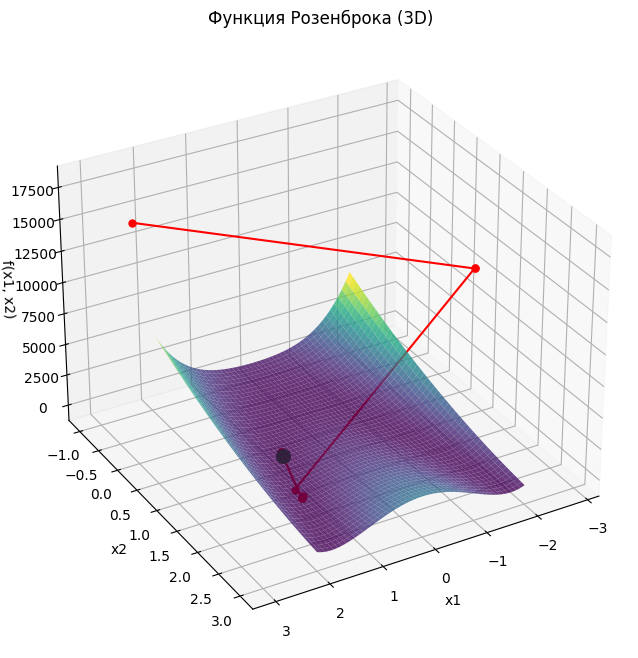

In [ ]:
def polak_ribiere(x0, tol=1e-6, max_iter=1000):
    x = x0
    path = [x.copy()]
    g = rosenbrock.derivative(x)
    d = -g
    k = 0

    while np.linalg.norm(g) > tol and k < max_iter:
        # Вычисление шага с помощью простого линейного поиска (например, методом золотого сечения)
        alpha = 1
        while rosenbrock.func(x + alpha * d) > rosenbrock.func(x) + 0.01 * alpha * np.dot(g, d):
            alpha *= 0.5  # Уменьшаем шаг, пока условия не будут выполнены

        x_new = x + alpha * d
        g_new = rosenbrock.derivative(x_new)


        beta = np.dot(g_new, g_new-g) / np.dot(g, g)
        d = -g_new + beta * d

        x = x_new
        g = g_new
        k += 1
        path.append(x.copy())

    return np.array(path), rosenbrock.func(x), k

x0 = np.array([3.0, 0.0])
solution, function_value, iterations = polak_ribiere(x0)

print("Оптимальное решение:", solution[-1])
print("Минимальное значение функции:", function_value)
print("Число итераций:", iterations)
sols = []
step=len(solution)//50
for i in range (0,len(solution),step):
  sols.append(solution[i])

show_path(np.array(sols))


### Метод Девидона-Флетчера-Пауэлла

Оптимальное решение: [1.00000007 1.00000013]
Минимальное значение функции: 12.000000000000012
Число итераций: 49


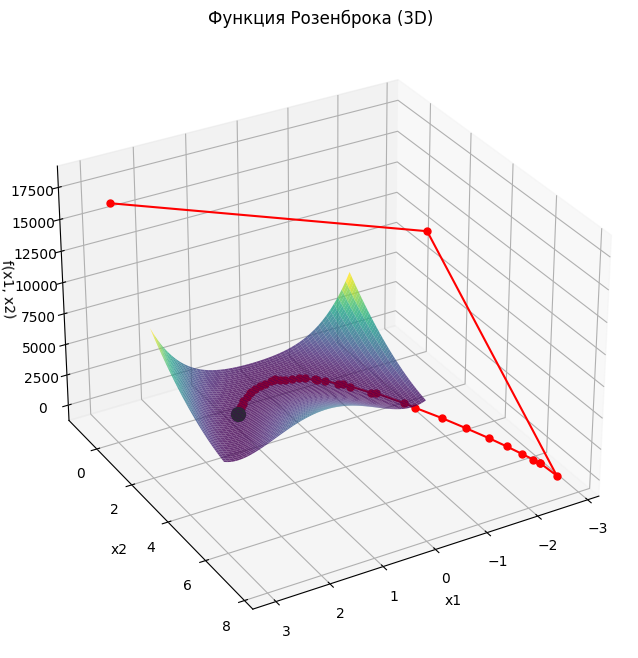

In [ ]:
def dfp(x0, tol=1e-6, max_iter=1000):
    x = x0
    path = [x.copy()]
    g = rosenbrock.derivative(x)
    k = 0
    n=len(x)
    H = np.eye(n)

    while np.linalg.norm(g) > tol and k < max_iter:
        d = -H @ g
        # Вычисление шага с помощью простого линейного поиска (например, методом золотого сечения)
        alpha = 1
        while rosenbrock.func(x + alpha * d) > rosenbrock.func(x) + 0.01 * alpha * np.dot(g, d):
            alpha *= 0.5  # Уменьшаем шаг, пока условия не будут выполнены


        x_new = x + alpha * d
        g_new = rosenbrock.derivative(x_new)

        s = x_new - x
        y = g_new - g

        rho = 1.0 / (y @ s)
        H = (np.eye(n) - rho * np.outer(s, y)) @ H @ (np.eye(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)

        x = x_new
        g = g_new
        path.append(x.copy())
        k+=1

    return np.array(path), rosenbrock.func(x), k

x0 = np.array([3.0, 0.0])
solution, function_value, iterations = dfp(x0)

print("Оптимальное решение:", solution[-1])
print("Минимальное значение функции:", function_value)
print("Число итераций:", iterations)

show_path(solution)


### Метод Левенберга-Марквардта

Оптимальное решение: [1.00000009 1.00000017]
Минимальное значение функции: 12.000000000000021
Число итераций: 37


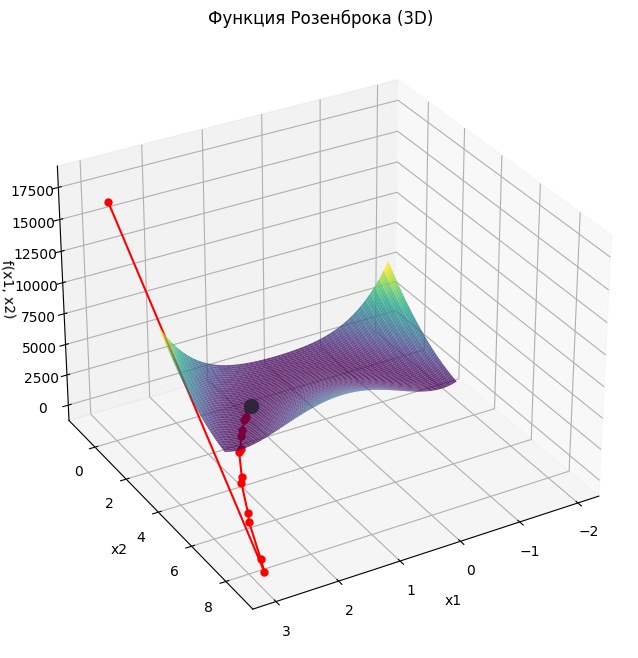

In [ ]:
from numpy.linalg import inv
def levenberg_marquardt(x0, tol=1e-6, max_iter=10000, lambda_init=3):
    x = x0
    path = [x.copy()]
    k=0
    lambda_ = lambda_init

    for iteration in range(max_iter):
        grad = rosenbrock.derivative(x)

        if np.linalg.norm(grad) < tol:
            break

        H = rosenbrock.hessian(x)

        while True:
          H_lm = H + lambda_ * np.eye(len(x))

          delta = np.linalg.solve(H_lm, -grad)
          x_new = x + delta

          if rosenbrock.func(x_new) < rosenbrock.func(x):
              x = x_new
              lambda_ *= 0.5
              break
          else:
              lambda_ *= 2


        path.append(x.copy())
        k+=1

    return np.array(path), rosenbrock.func(x), k

x0 = np.array([3.0, 0.0])
solution, function_value, iterations = levenberg_marquardt(x0)

print("Оптимальное решение:", solution[-1])
print("Минимальное значение функции:", function_value)
print("Число итераций:", iterations)

show_path(solution)